# EDA (Exploratory Data Analysis) de los archivos de Internet.xlsx, telefonia_fija.xlsx y Television.xlsx

Se realizará el análisis de los mencionados datasets para observar el comportamiento de este sector a nivel nacional y provincial. 

Para ello no solo se considerará el comportamiento del sector Internet, sino también el comportamiento asociado a otros 2 servicios de comunicación: telefonía fija y televisión, con el fin de identificar oportunidades de crecimiento ya que en estas 2 áreas se pueden utilizar la infraestructura ya existente para brindar acceso a Internet.

# Paso 0: Importar librerias necesarias para el EDA y cargar los datasets que seran analizados.

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

* Pandas y NumPy para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.
* Warnings para legibilidad del código y visualizaciones.

In [2]:
pob_penetracion = pd.read_excel('Internet.xlsx', 'Penetración-poblacion')
hogares_penetracion = pd.read_excel('Internet.xlsx', 'Penetracion-hogares')
tv_accesos = pd.read_excel('Television.xlsx', 'Accesos_prov_TV')
tlf_accesos = pd.read_excel('telefonia_fija.xlsx', 'Fija_prov_tipo')
tecno_accesos = pd.read_excel('Internet.xlsx', 'Accesos Por Tecnología')
tecno_total_accesos = pd.read_excel('Internet.xlsx', 'Totales Accesos Por Tecnología')

Los datasets seleccionados fueron:

*Todos los datasets van desde comienzos de 2014 hasta el 2do trimestre de 2024*

* 'Penetración-poblacion': data relacionada a la penetracion de internet por cada 100 habitantes por provincia.

* 'Penetración-hogares': data relacionada a la penetracion de internet por cada 100 hogares por provincia.

* 'Accesos_prov_TV': data que recoge el numero de accesos a television por suscripcion por provincia.

* 'Fija_prov_tipo': data que recoge el numero de accesos a telefonía fija por tipo de cliente por provincia.

* 'Accesos Por Tenología': data que recoge el numero de accesos a internet por tipo de tecnología por provincia.

* 'Totales Accesos Por Tenología': data que recoge el numero de accesos a internet por tipo de tecnología a nivel nacional.

# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

## 1. Penetracion del servicio de Internet en la poblacion

In [3]:
pob_penetracion.shape

(1000, 4)

El dataset contiene 1000 filas y 4 columnas

In [4]:
pob_penetracion.columns.tolist()

['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab']

Se observa que las columnas del dataset corresponden a los accesos por cada 100 habitantes separados segun el año, trimestre y provincia.

In [5]:
pob_penetracion.nunique()

Año                          11
Trimestre                     4
Provincia                    24
Accesos por cada 100 hab    990
dtype: int64

Para las 3 primeras columas se observan la cantidad de valores unicos:
- 11 años: se esperaria que sean consecutivos
- 4 trimestres por año (lo esperado y correcto)
- 24 provincias (el numero de provincias en Argentina)

In [6]:
print(f'Años:\n {pob_penetracion['Año'].unique().tolist()}')
print(f'Trimestres:\n {pob_penetracion['Trimestre'].unique().tolist()}')
print('\nProvincias:')
pob_penetracion['Provincia'].unique().tolist()

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Trimestres:
 [2, 1, 4, 3]

Provincias:


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

Se observa que:
* Las provincias son correctamente las 24 provincias de Argentina.
* Los trimestres son valores numericos del 1 al 4, **lo cual es correcto** (un año tiene 4 trimestres).
* El dataset va desde el año 2014 hasta el 2024.

Para asegurarnos del rango de tiempo con el que se esta trabajando, ordenaremos el dataset segun el año y el trimestre para ver el rango de tiempo

In [7]:
pob_penetracion.sort_values(by=['Año','Trimestre','Provincia'], ascending=[False,False,True])

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.430000
1,2024,2,Capital Federal,47.440000
2,2024,2,Catamarca,17.500000
3,2024,2,Chaco,11.780000
4,2024,2,Chubut,26.460000
...,...,...,...,...
995,2014,1,La Rioja,4.353175
996,2014,1,Mendoza,8.933318
997,2014,1,Misiones,6.323161
998,2014,1,Neuquén,14.882266


Ahora se sabe con certeza que los datos recolectados van desde el primer trimestre de 2014 hasta el 2do trimetre de 2024

Dicho lo anterior, se espera que, al haber 24 provincias estudiadas trimestralmente a lo largo de 10.5 años, la cantidad de filas que se deberian tener en este data set es:

$24\times(10\times4+2)=1008$

donde en cada año (excepto 2024) deberia tener $24\times4=96$ valores

y el dataset solo tiene 1000, por lo que buscaremos cuales son esos datos faltantes.

In [8]:
pob_penetracion.groupby('Año').count()

,Trimestre,Provincia,Accesos por cada 100 hab
Año,,,
2014,88,88,88
2015,96,96,96
2016,96,96,96
2017,96,96,96
2018,96,96,96
2019,96,96,96
2020,96,96,96
2021,96,96,96
2022,96,96,96


Aqui se observan que faltan 8 valores del año 2014

In [9]:
pob_penetracion[pob_penetracion['Año']==2014].value_counts(subset='Trimestre')

Trimestre
2    24
3    24
4    24
1    16
Name: count, dtype: int64

Los 8 valores faltantes se encuentran en el primer trimestre de 2014

In [10]:
mask = set(pob_penetracion[(pob_penetracion['Año']==2014)&(pob_penetracion['Trimestre']==1)]['Provincia'].unique().tolist())
mask

{'Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro'}

Acá se creo un set con las provincias presentes en el 1er trimestre de 2014

In [11]:
set(pob_penetracion['Provincia'].unique().tolist())-mask

{'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán'}

El set anterior representa las provincias de las cuales no se tienen datos en el 1er trimestre de 2014

**más adelante se decidirá que hacer con este hallazgo**

In [12]:
pob_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [13]:
pob_penetracion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Se observa que **no hay datos nulos** en este dataset

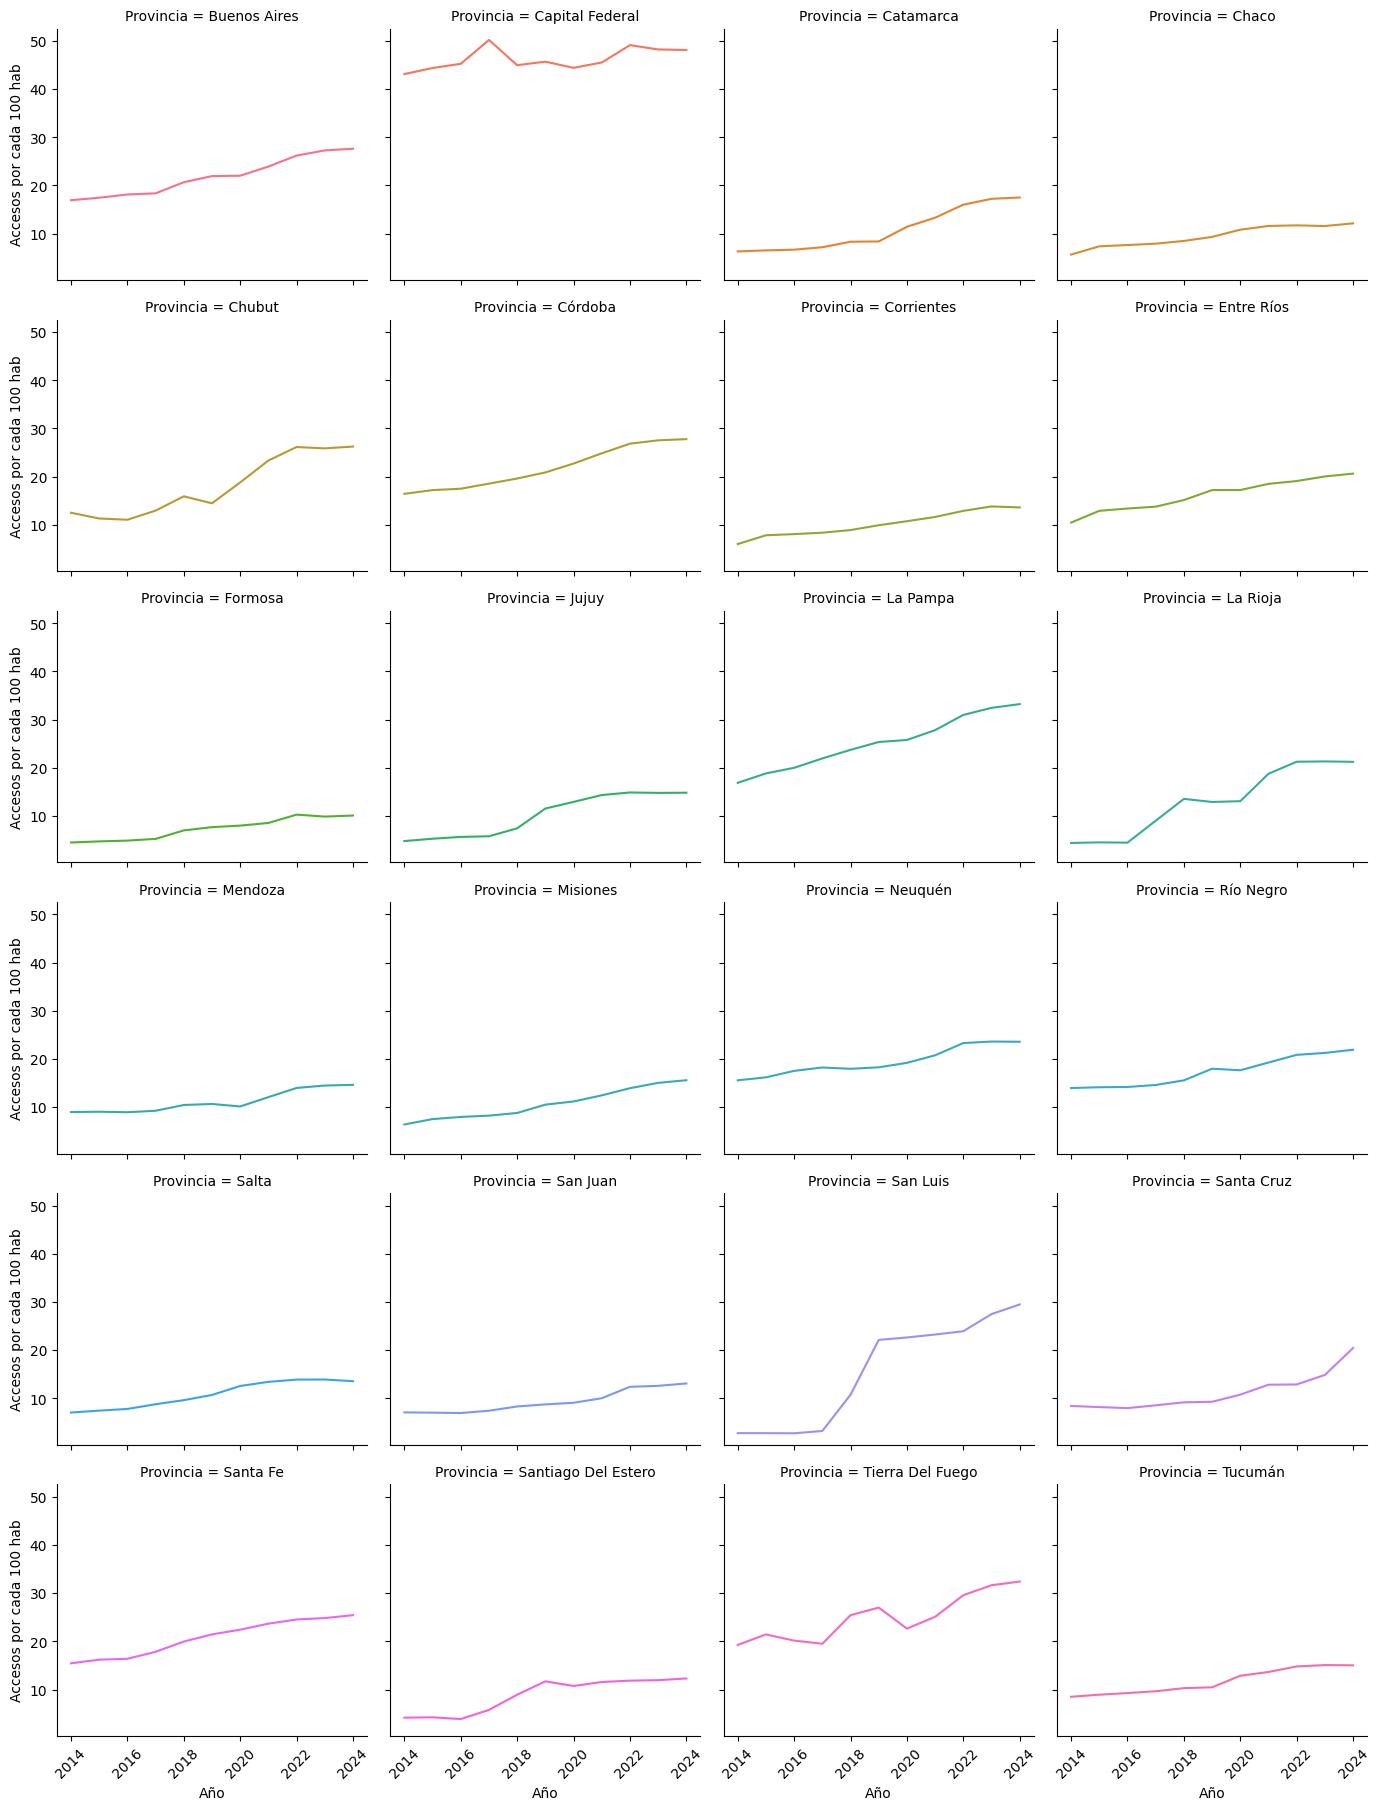

In [14]:
grid = sns.FacetGrid(pob_penetracion, col='Provincia', hue='Provincia', col_wrap=4)
grid.map_dataframe(sns.lineplot,x='Año',y='Accesos por cada 100 hab',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(14)

plt.show()

De aca podemos resaltar que :
1. Los cambios a traves del tiempo son razonable, incluso aquellos que se pudieran observar bruscos, como el caso de la provincia de San Luis en el año 2019
2. Hay una tendencia creciente a que hayan mas personas con acceso a internet.
3. Donde hay mayor acceso a Internet por cada 100 habitantes y con notoria diferencia es en la Capital Federal

A partir del punto 1. se concluye que, como no hay cambios bruscos inexplicables o irracionales, entonces podemos decir que **no hay valores erróneos** en este dataset

In [15]:
print(pob_penetracion.duplicated().sum())

0


Acá se revisa los valores duplicados y se observa que **no hay valores duplicados** en este dataset

# 2. Penetracion del servicio de Internet en los hogares

In [16]:
hogares_penetracion.shape

(1000, 4)

Al igual que con la poblacion, el dataset contiene 1000 filas y 4 columnas, **8 filas menos de lo esperado**

In [17]:
hogares_penetracion.columns.tolist()

['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']

Se observa que las columnas del dataset corresponden a los accesos por cada 100 hogares separados segun el año, trimestre y provincia.

In [18]:
hogares_penetracion.nunique()

Año                              11
Trimestre                         4
Provincia                        24
Accesos por cada 100 hogares    993
dtype: int64

Para las 3 primeras columas se observan la cantidad de valores unicos:
- 11 años: se esperaria que sean consecutivos
- 4 trimestres por año **(lo esperado y correcto)**
- 24 provincias (el numero de provincias en Argentina)

In [19]:
print(f'Años:\n {hogares_penetracion['Año'].unique().tolist()}')
print(f'Trimestres:\n {hogares_penetracion['Trimestre'].unique().tolist()}')
print('\nProvincias:')
hogares_penetracion['Provincia'].unique().tolist()

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Trimestres:
 [2, 1, 4, 3]

Provincias:


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

Se observa que:
* **Las provincias estan correctas**, ya que corresponden con las 24 provincias de Argentina.
* Los trimestres son valores numericos del 1 al 4, **lo cual es correcto** (un año tiene 4 trimestres).
* El dataset va desde el año 2014 hasta el 2024.

Para asegurarnos del rango de tiempo con el que se esta trabajando, ordenaremos el dataset segun el año y el trimestre para ver el rango de tiempo

In [20]:
hogares_penetracion.sort_values(by=['Año','Trimestre','Provincia'], ascending=[False,False,True])

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.840000
1,2024,2,Capital Federal,116.370000
2,2024,2,Catamarca,68.810000
3,2024,2,Chaco,44.060000
4,2024,2,Chubut,86.330000
...,...,...,...,...
995,2014,1,La Rioja,16.294105
996,2014,1,Mendoza,31.913123
997,2014,1,Misiones,23.136539
998,2014,1,Neuquén,49.791605


Los datos recolectados van desde el primer trimestre de 2014 hasta el 2do trimetre de 2024.

Se espera que hayan 1008 filas, 96 por año, excepto para 2024 que deberia haber 48

In [21]:
hogares_penetracion.groupby('Año').count()

,Trimestre,Provincia,Accesos por cada 100 hogares
Año,,,
2014,88,88,88
2015,96,96,96
2016,96,96,96
2017,96,96,96
2018,96,96,96
2019,96,96,96
2020,96,96,96
2021,96,96,96
2022,96,96,96


Nuevamente, los valores faltantes se encuentran en el año 2014

In [22]:
hogares_penetracion[hogares_penetracion['Año']==2014].value_counts(subset='Trimestre')

Trimestre
2    24
3    24
4    24
1    16
Name: count, dtype: int64

en el 1er trimestre de dicho año

In [23]:
mask2 = set(hogares_penetracion[(hogares_penetracion['Año']==2014)&(hogares_penetracion['Trimestre']==1)]['Provincia'].unique().tolist())
mask2

{'Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro'}

Un set que contiene las provincias presentes en el 1er semestre de 2014

In [24]:
set(hogares_penetracion['Provincia'].unique().tolist())-mask2

{'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán'}

Los mismos datos faltantes en la penetracion por cada 100 habitantes son los mismos faltantes en este dataset.

**más adelante se decidirá que hacer con este hallazgo**

In [25]:
hogares_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [26]:
hogares_penetracion.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

**No se observan valores nulos** en el dataset.

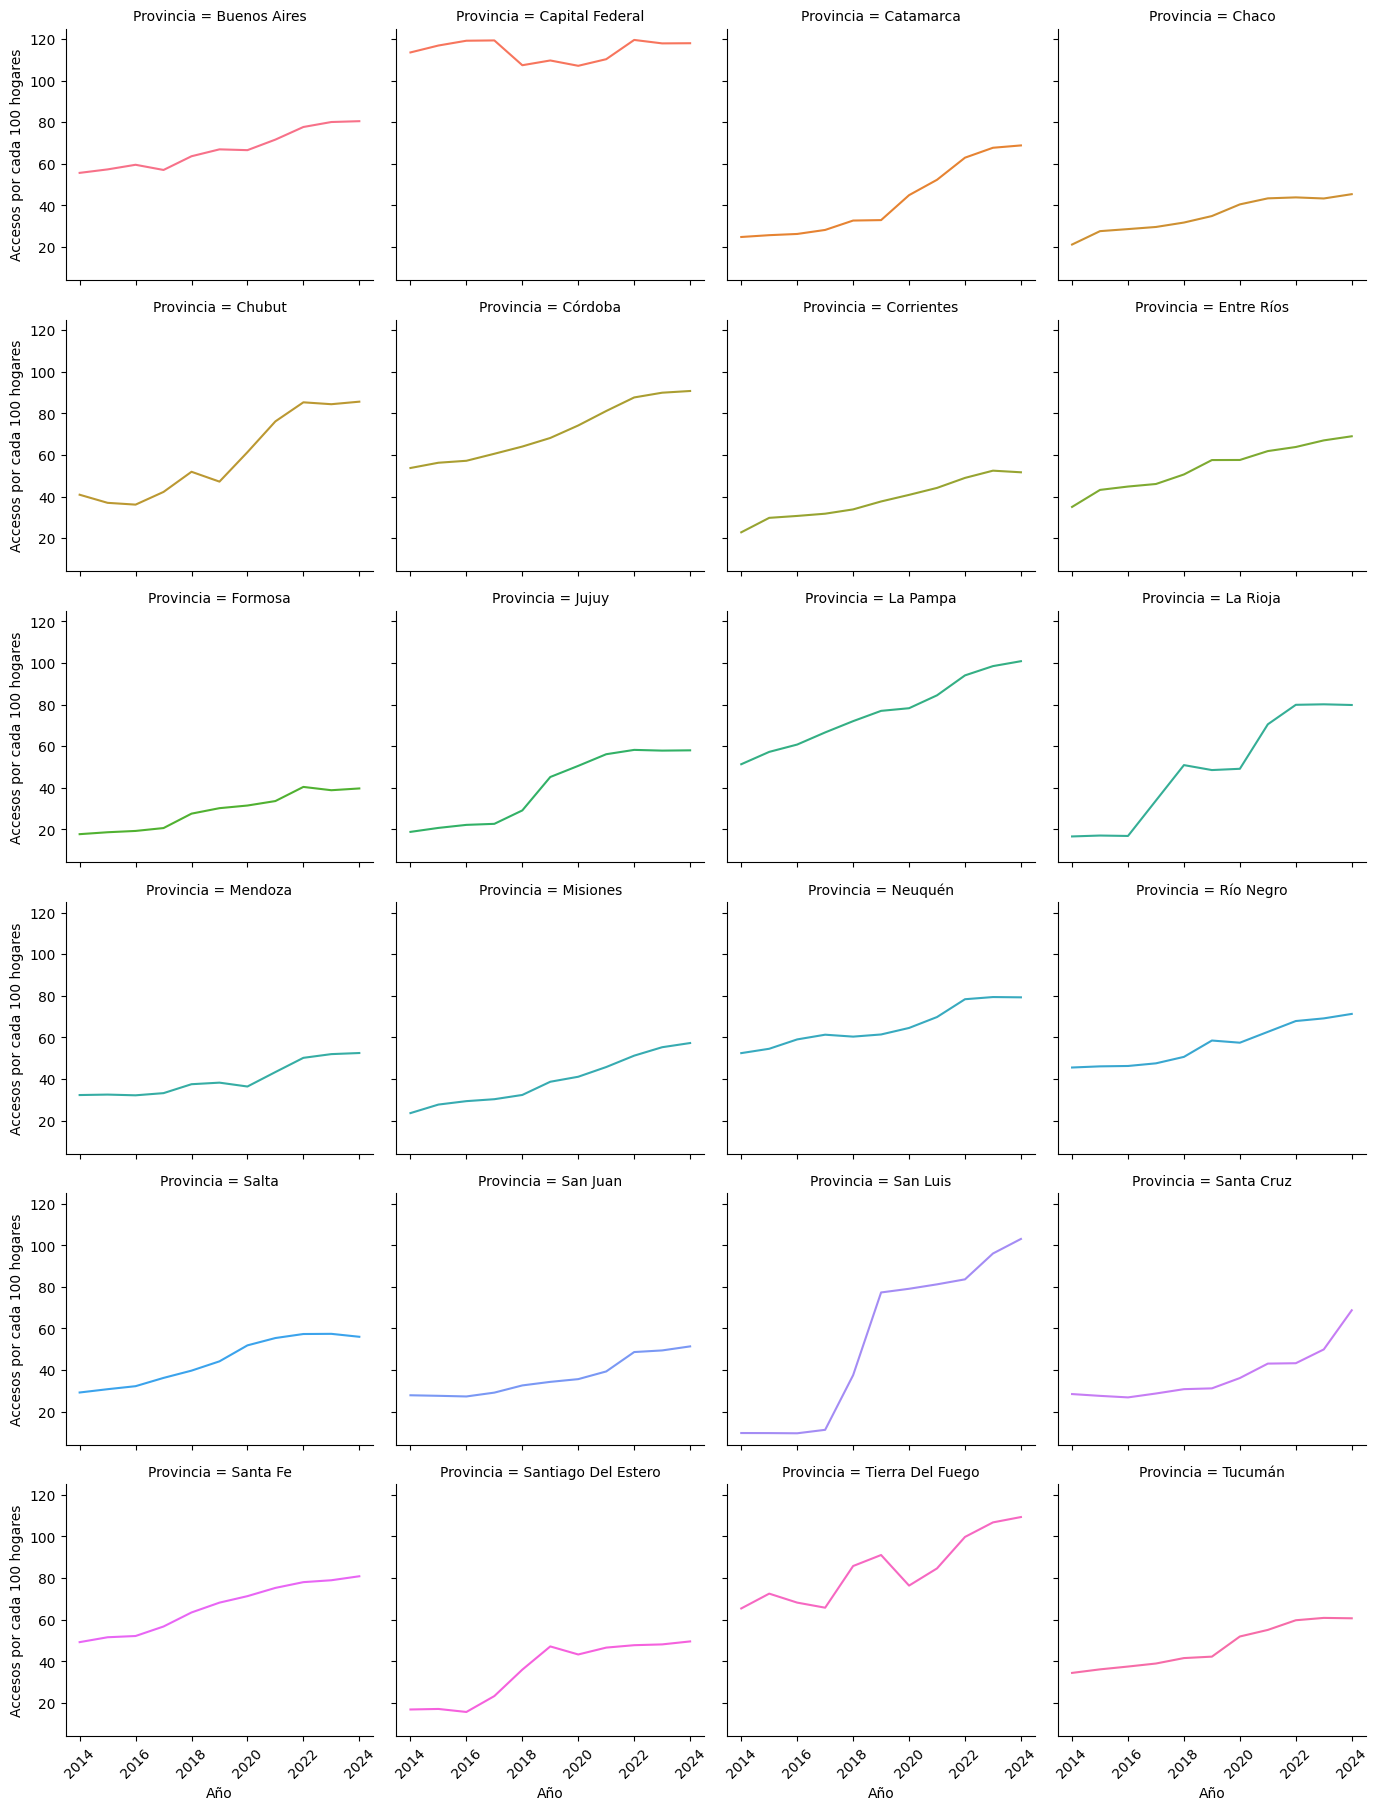

In [27]:
grid = sns.FacetGrid(hogares_penetracion, col='Provincia', hue='Provincia', col_wrap=4)
grid.map_dataframe(sns.lineplot,x='Año',y='Accesos por cada 100 hogares',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(14)

plt.show()

De aca podemos resaltar que :
1. La provincia con mayor penetracion por cada 100 hogares es Capital Federal, consistente con lo observado con la penetracion por cada 100 habitantes.
2. Al igual que en la grafica de poblacion, en San Luis se observa un pico creciente hacia el año 2019, crecimiento (no tan abrupto) que continua en los años siguientes.
3. Hay una tendencia creciente en todas las provincias de la penetracion del internet en los hogares argentinos.
4. Incluso cen aquellos casos con ciertos picos, los mismos se pueden considerar razonables y no ser causa de dudas acerca de la calidad del dato.

En conclusión, **no se considera que haya valores erróneos** en este dataset.

In [28]:
print(hogares_penetracion.duplicated().sum())

0


**No hay valores duplicados** en este dataset.

# 3. Accesos a televisión por provincia

In [29]:
tv_accesos.shape

(1008, 4)

El dataset contiene 4 columnas y 1008 filas.

Este dataset **si contiene la cantidad de filas esperada**

In [30]:
tv_accesos.columns.tolist()

['Año', 'Trimestre', 'Provincia', 'Accesos TV por suscripción (Vrf)']

Se observa que las columnas del dataset corresponden al total de accesos a TV po suscripcion, separados segun el año, trimestre y provincia.

In [31]:
tv_accesos.groupby('Año').count()

,Trimestre,Provincia,Accesos TV por suscripción (Vrf)
Año,,,
2014,96,96,96
2015,96,96,96
2016,96,96,96
2017,96,96,96
2018,96,96,96
2019,96,96,96
2020,96,96,96
2021,96,96,96
2022,96,96,96


Corroborando lo que se espera de la distribucion de las filas en el dataset.

In [32]:
tv_accesos.nunique()

Año                                   11
Trimestre                              4
Provincia                             26
Accesos TV por suscripción (Vrf)    1006
dtype: int64

Aqui **se observa algo inesperado**, y es 26 valores unicos de provincias, cuando deberian ser 24. Los demás valores son los esperados.

In [33]:
print(f'Años:\n {tv_accesos['Año'].unique().tolist()}')
print(f'Trimestres:\n {tv_accesos['Trimestre'].unique().tolist()}')
print('\nProvincias:')
tv_accesos['Provincia'].unique().tolist()

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Trimestres:
 [2, 1, 4, 3]

Provincias:


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán',
 'Santiago del Estero',
 'Tierra del Fuego']

El codigo anterior es para observar los valores unicos, donde para el año y trimestre todo esta correcto.

Para las provincias, el error esta en las provincias de Santiago Del Estero y Tierra Del fuego, donde hay 2 valores donde la palabra "Del" está en minúscula.

Se cambiaran esas minúsculas por mayúsculas para tener las 24 provincias y que esten escritas igual como los datasets revisados anteriormente.

In [34]:
tv_accesos.replace({'Provincia':{'Santiago del Estero':'Santiago Del Estero',
                                 'Tierra del Fuego':'Tierra Del Fuego'}},
                                 inplace=True)

tv_accesos['Provincia'].unique().tolist()

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

Con el codigo anterior se ha cambiado los 2 valores erróneos.

Para asegurarnos del rango de tiempo con el que se esta trabajando, ordenaremos el dataset segun el año y el trimestre para ver el rango de tiempo

In [35]:
tv_accesos.sort_values(by=['Año','Trimestre','Provincia'], ascending=[False,False,True])

,Año,Trimestre,Provincia,Accesos TV por suscripción (Vrf)
0,2024,2,Buenos Aires,2873482
1,2024,2,Capital Federal,693686
2,2024,2,Catamarca,54865
3,2024,2,Chaco,115238
4,2024,2,Chubut,78471
...,...,...,...,...
1003,2014,1,Santa Cruz,21133
1004,2014,1,Santa Fe,546523
1005,2014,1,Santiago Del Estero,92972
1006,2014,1,Tierra Del Fuego,29886


Los datos recolectados van desde el primer trimestre de 2014 hasta el 2do trimetre de 2024

In [36]:
tv_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Año                               1008 non-null   int64 
 1   Trimestre                         1008 non-null   int64 
 2   Provincia                         1008 non-null   object
 3   Accesos TV por suscripción (Vrf)  1008 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.6+ KB


In [37]:
tv_accesos.isna().sum()

Año                                 0
Trimestre                           0
Provincia                           0
Accesos TV por suscripción (Vrf)    0
dtype: int64

**No hay valores nulos** en el dataset.

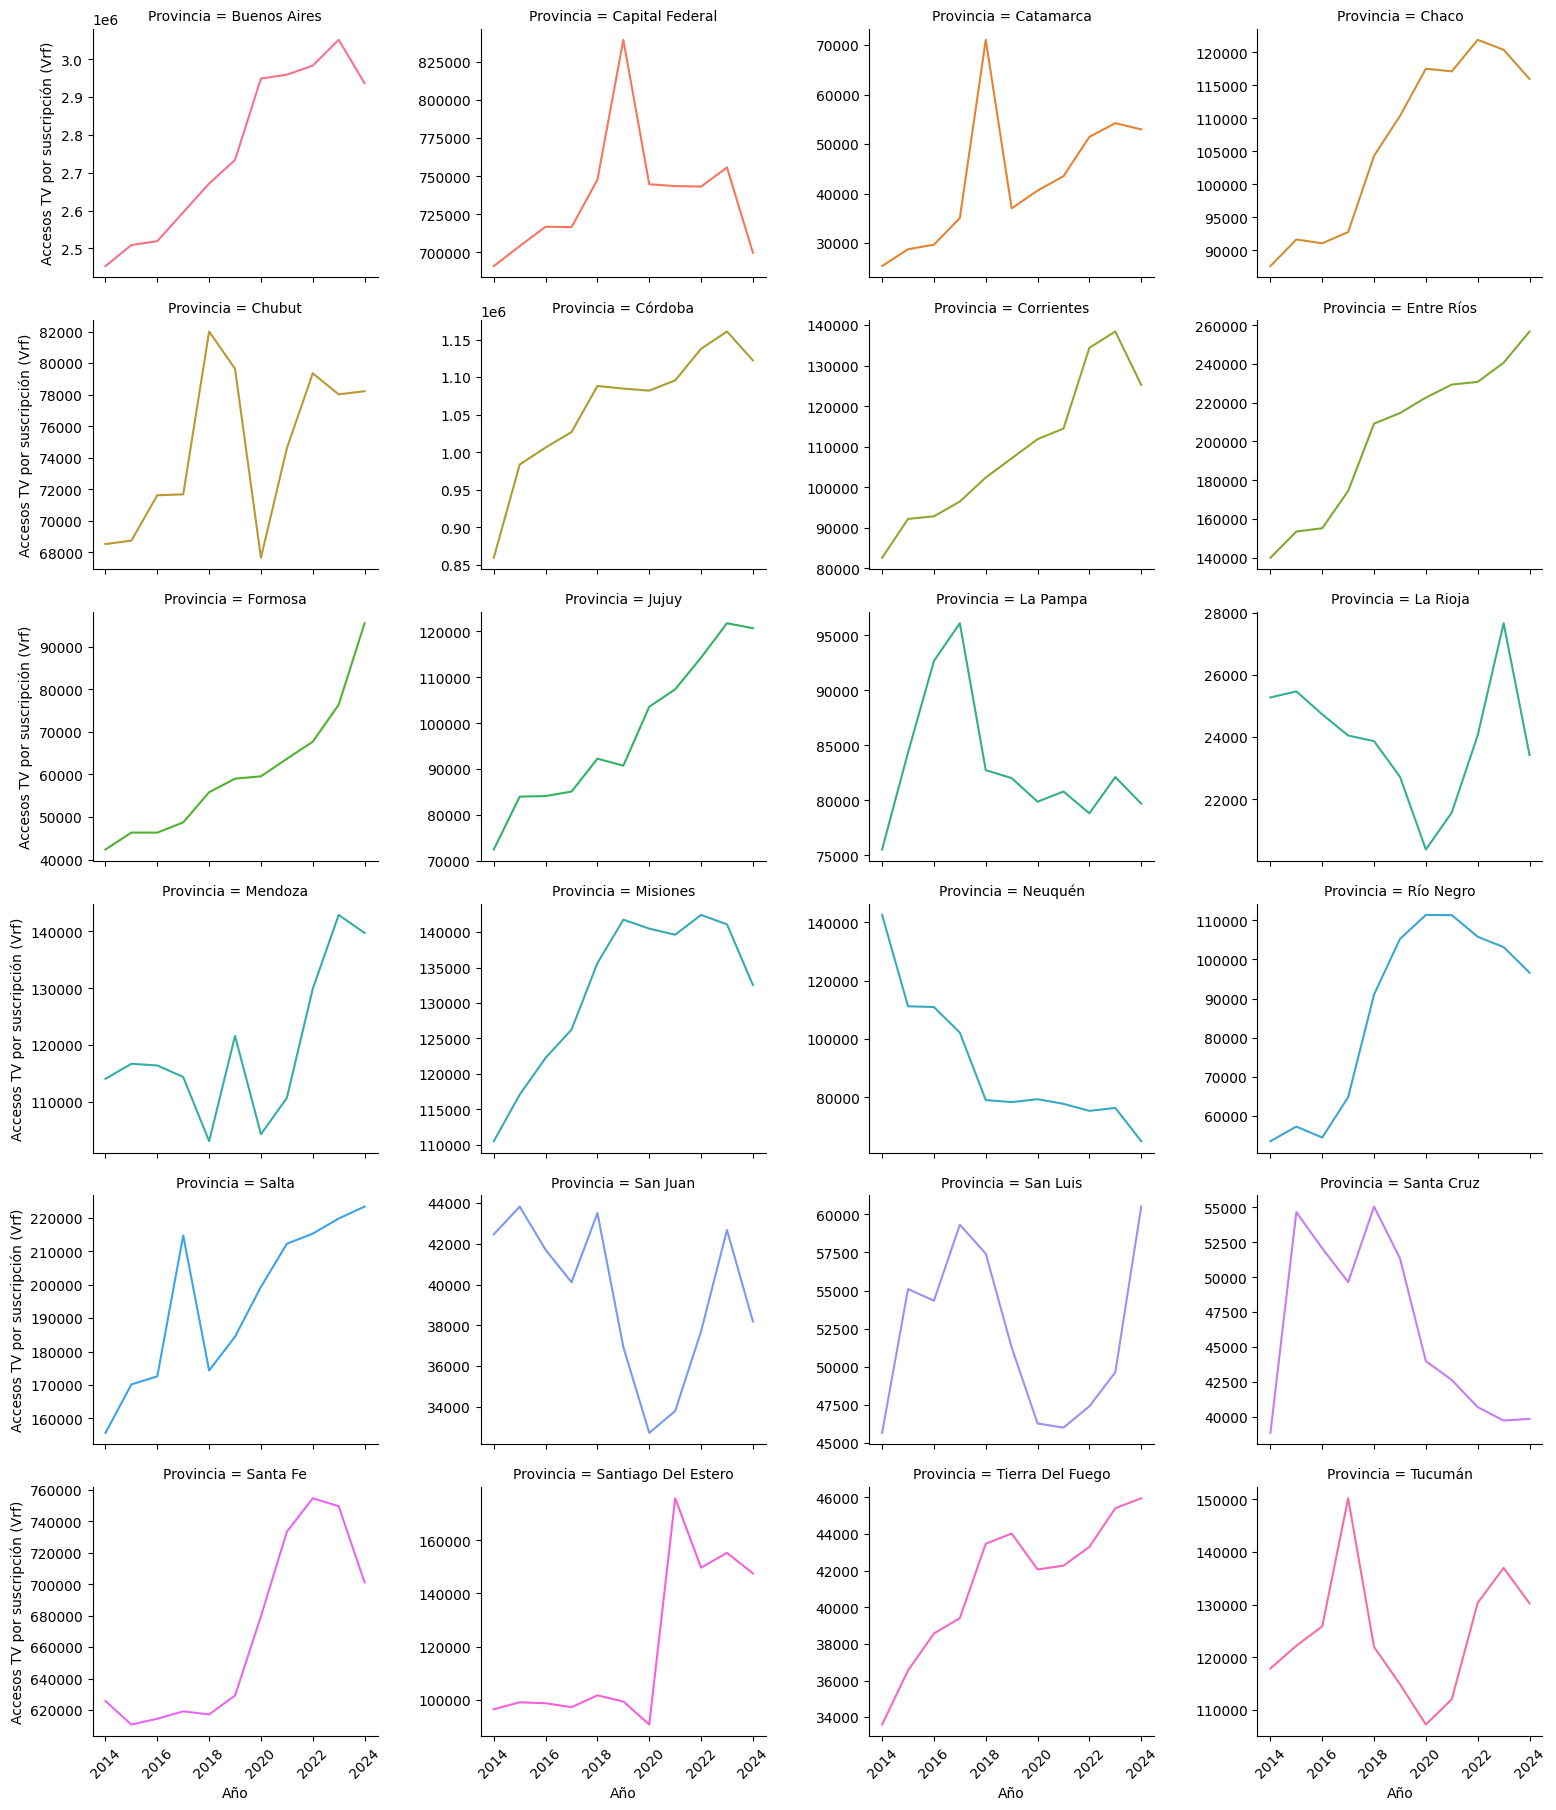

In [38]:
grid = sns.FacetGrid(tv_accesos, col='Provincia', hue='Provincia', col_wrap=4, sharey= False)
grid.map_dataframe(sns.lineplot,x='Año',y='Accesos TV por suscripción (Vrf)',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(16)

plt.show()

De aca observamos que:
1. No hay una tendencia general sobre las subscripciones al pasar el tiempo. Algunas provincias presentan cierto crecimiento en general, pero otras presentan constantes variaciones y picos.
2. A pesar de observarse grandes variaciones en los graficos, estos se mantienen en el mismo orden (ver los valores del eje y), por lo que dichos cambios no se atribuyen a valores erróneos.

En conclusión, **no se considera que haya valores erróneos** en este dataset.

In [39]:
print(tv_accesos.duplicated().sum())

0


**No hay valores duplicados** en este dataset.

# 4. Accesos a telefonía fija por provincia

In [40]:
tlf_accesos.shape

(1008, 8)

Este dataset contiene 1008 filas y 8 columnas, **observandose la cantidad de filas esperada**

In [41]:
tlf_accesos.columns.tolist()

['Año',
 'Trimestre',
 'Provincia',
 'Accesos telefonía fija (total)',
 'Accesos telefonía fija (hogares)',
 'Accesos telefonía fija (comercial)',
 'Accesos telefonía fija (gobierno)',
 'Accesos telefonía fija (otros)']

Se observa que las columnas del dataset corresponden al total de accesos a telefonia fija segun el tipo de cliente (hogares, comercial, gobierno, otros) separados segun el año, trimestre y provincia.

In [42]:
tlf_accesos.nunique()

Año                                    11
Trimestre                               4
Provincia                              24
Accesos telefonía fija (total)        730
Accesos telefonía fija (hogares)      768
Accesos telefonía fija (comercial)    743
Accesos telefonía fija (gobierno)     516
Accesos telefonía fija (otros)        733
dtype: int64

Para los valores de Año, Trimestre y Provincia **se observan los valores esperados**


In [43]:
tlf_accesos.groupby('Año').count()

,Trimestre,Provincia,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros)
Año,,,,,,,
2014,96,96,96,96,96,96,96
2015,96,96,96,96,96,96,96
2016,96,96,96,96,96,96,96
2017,96,96,96,96,96,96,96
2018,96,96,96,96,96,96,96
2019,96,96,96,96,96,96,96
2020,96,96,96,96,96,96,96
2021,96,96,96,96,96,96,96
2022,96,96,96,96,96,96,96


Corroborando que la distribucion de filas por año es la esperada

In [44]:
print(f'Años:\n {tlf_accesos['Año'].unique().tolist()}')
print(f'Trimestres:\n {tlf_accesos['Trimestre'].unique().tolist()}')
print('\nProvincias:')
tlf_accesos['Provincia'].unique().tolist()

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Trimestres:
 [2, 1, 4, 3]

Provincias:


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

* Se corrobora que los valores de Año, Trimestre y Provincia son los correctos.
* Se observa que las provincias de `'Santiago del Estero'` y `'Tierra del Fuego'` usan minúscula en `'del'`. **para mantener la consistencia, se cambiará la palabra `del` a mayúscula como está en los anteriores datasets.**

In [45]:
tlf_accesos.replace({'Provincia':{'Santiago del Estero':'Santiago Del Estero',
                                 'Tierra del Fuego':'Tierra Del Fuego'}},
                                 inplace=True)

tlf_accesos['Provincia'].unique().tolist()

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

In [46]:
tlf_accesos.sort_values(by=['Año','Trimestre','Provincia'], ascending=[False,False,True])

,Año,Trimestre,Provincia,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros)
0,2024,2,Buenos Aires,3147886,2793773,299661,12436,42016
1,2024,2,Capital Federal,1651854,1466033,157247,6526,22048
2,2024,2,Catamarca,20365,18074,1939,80,272
3,2024,2,Chaco,53967,47897,5137,213,720
4,2024,2,Chubut,54140,48049,5154,214,723
...,...,...,...,...,...,...,...,...
1003,2014,1,Santa Cruz,40625,33555,4528,131,2411
1004,2014,1,Santa Fe,770361,636284,85867,2491,45719
1005,2014,1,Santiago Del Estero,70717,58409,7882,229,4197
1006,2014,1,Tierra Del Fuego,32631,26951,3637,106,1937


Se corrobora que ell rango de tiempo va desde el 1er trimestre de 2014 al 2do trimestre de 2024

In [47]:
tlf_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Año                                 1008 non-null   int64 
 1   Trimestre                           1008 non-null   int64 
 2   Provincia                           1008 non-null   object
 3   Accesos telefonía fija (total)      1008 non-null   int64 
 4   Accesos telefonía fija (hogares)    1008 non-null   int64 
 5   Accesos telefonía fija (comercial)  1008 non-null   int64 
 6   Accesos telefonía fija (gobierno)   1008 non-null   int64 
 7   Accesos telefonía fija (otros)      1008 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.1+ KB


In [48]:
tlf_accesos.isna().sum()

Año                                   0
Trimestre                             0
Provincia                             0
Accesos telefonía fija (total)        0
Accesos telefonía fija (hogares)      0
Accesos telefonía fija (comercial)    0
Accesos telefonía fija (gobierno)     0
Accesos telefonía fija (otros)        0
dtype: int64

El dataset **no contiene valores nulos**

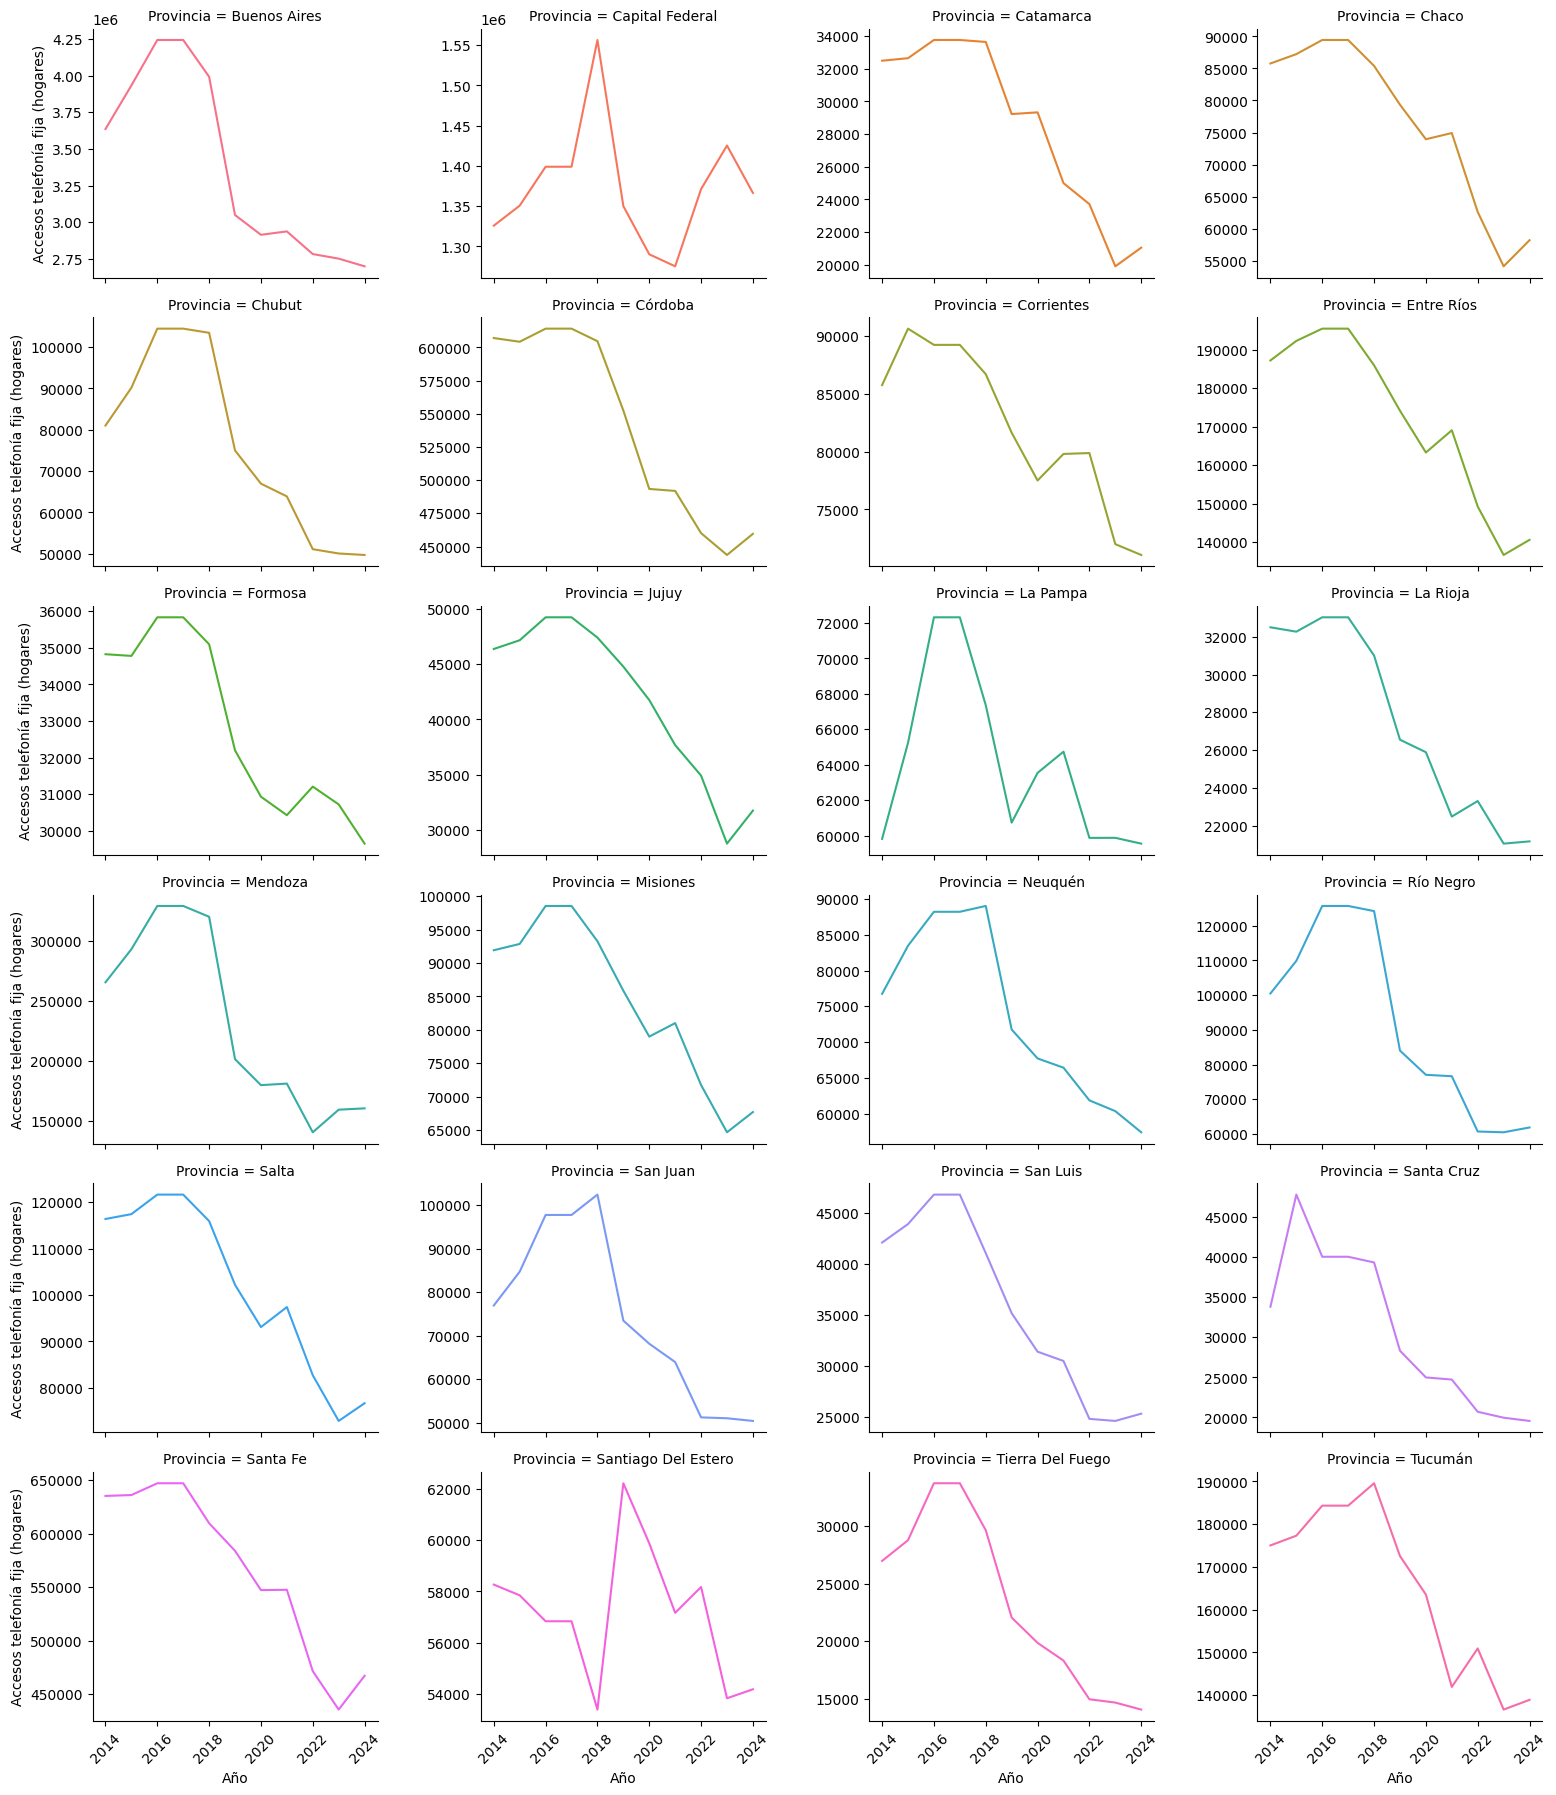

In [49]:
grid = sns.FacetGrid(tlf_accesos, col='Provincia', hue='Provincia', col_wrap=4, sharey=False)
grid.map_dataframe(sns.lineplot,x='Año',y='Accesos telefonía fija (hogares)',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(16)

plt.show()

De aca se observa que :
1. Hay una tendencia general al decrecimiento a traves del tiempo, es decir, hay cada vez menos accesos a lineas telefonicas fijas.
2. La mayoría de las curvas son suaves, y aquellas con picos, lo son en el mismo order de magnitud, por lo que no se tendrian que considerar como valores erróneos.

A partir del punto 1. podemos pensar que debido a la mayor tendencia a poseer teléfonos móviles, y a que la velocidad de internet que se puede ofrecer mediante las lineas fijas (ADSL) son limitadas y hay otras opciones con velocidades significativamente mayores (cablemodem o fibra optica por ejemplo), el uso de lineas telefonicas se ha ido volviendo obsoleto y la gente ha ido eliminando su uso.

A partir del punto 2. se concluye que, como no hay cambios bruscos inexplicables o irracionales, entonces podemos decir que **no hay valores erróneos** en este dataset.

In [50]:
print(tlf_accesos.duplicated().sum())

0


Acá se observa que **no hay valores duplicados** en este dataset

## 5. Numero de accesos por tecnologia nacionales.

In [51]:
tecno_total_accesos.shape

(42, 9)

Este dataset contiene 42 filas y 9 columnas. En este caso el numero de filas es solo 42 porque son los totales nacionales.

$(10\times4+2=42 \text{ filas})$

In [52]:
tecno_total_accesos.columns.tolist()

['Año',
 'Trimestre',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros',
 'Total',
 'Periodo']

Se observa que las columnas del dataset corresponden a los accesos totales por tipo de tecnologia a nivel nacional, separados segun el año y trimestre.

In [53]:
tecno_total_accesos.nunique()

Año             11
Trimestre        4
ADSL            42
Cablemodem      42
Fibra óptica    42
Wireless        42
Otros           42
Total           42
Periodo         42
dtype: int64

Se observa, al igual que el resto de los datasets, que cubre 11 años y los 4 valores unicos esperados para la columna de trimestre. Tambien se observa que ningun valor se mantiene en el tiempo al tener 42 valores unicos en las 42 filas de cada tecnologia.

In [54]:
tecno_total_accesos.groupby('Año').count()

,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
Año,,,,,,,,
2014,4,4,4,4,4,4,4,4
2015,4,4,4,4,4,4,4,4
2016,4,4,4,4,4,4,4,4
2017,4,4,4,4,4,4,4,4
2018,4,4,4,4,4,4,4,4
2019,4,4,4,4,4,4,4,4
2020,4,4,4,4,4,4,4,4
2021,4,4,4,4,4,4,4,4
2022,4,4,4,4,4,4,4,4


Corroborando la correcta distribucion de filas por año

In [55]:
print(f'Años:\n {tecno_total_accesos['Año'].unique().tolist()}')
print(f'Trimestres:\n {tecno_total_accesos['Trimestre'].unique().tolist()}')

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Trimestres:
 [2, 1, 4, 3]


**Se observan los valores esperados y correctos** para las columnas de Año y Trimestre.

In [56]:
tecno_total_accesos.sort_values(by=['Año','Trimestre'], ascending=[False,False]).head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [57]:
tecno_total_accesos.sort_values(by=['Año','Trimestre'], ascending=[False,False]).tail()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
37,2015,1,3756153,2668248,168188,79098,66045,6737732,Ene-Mar 2015
38,2014,4,3764038,2536219,149682,76984,71573,6598496,Oct-Dic 2014
39,2014,3,3714764,2569868,155494,85096,70049,6595271,Jul-Sept 2014
40,2014,2,3708882,2461670,149363,72405,72148,6464468,Abr-Jun 2014
41,2014,1,3697066,2407330,150323,70749,72930,6398398,Ene-Mar 2014


Se corrobora que el rango de tiempo va desde el 1er trimestre de 2014 hasta el 2do trimestre de 2024.

In [58]:
tecno_total_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [59]:
tecno_total_accesos.isna().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

El dataset **no contiene valores nulos.**

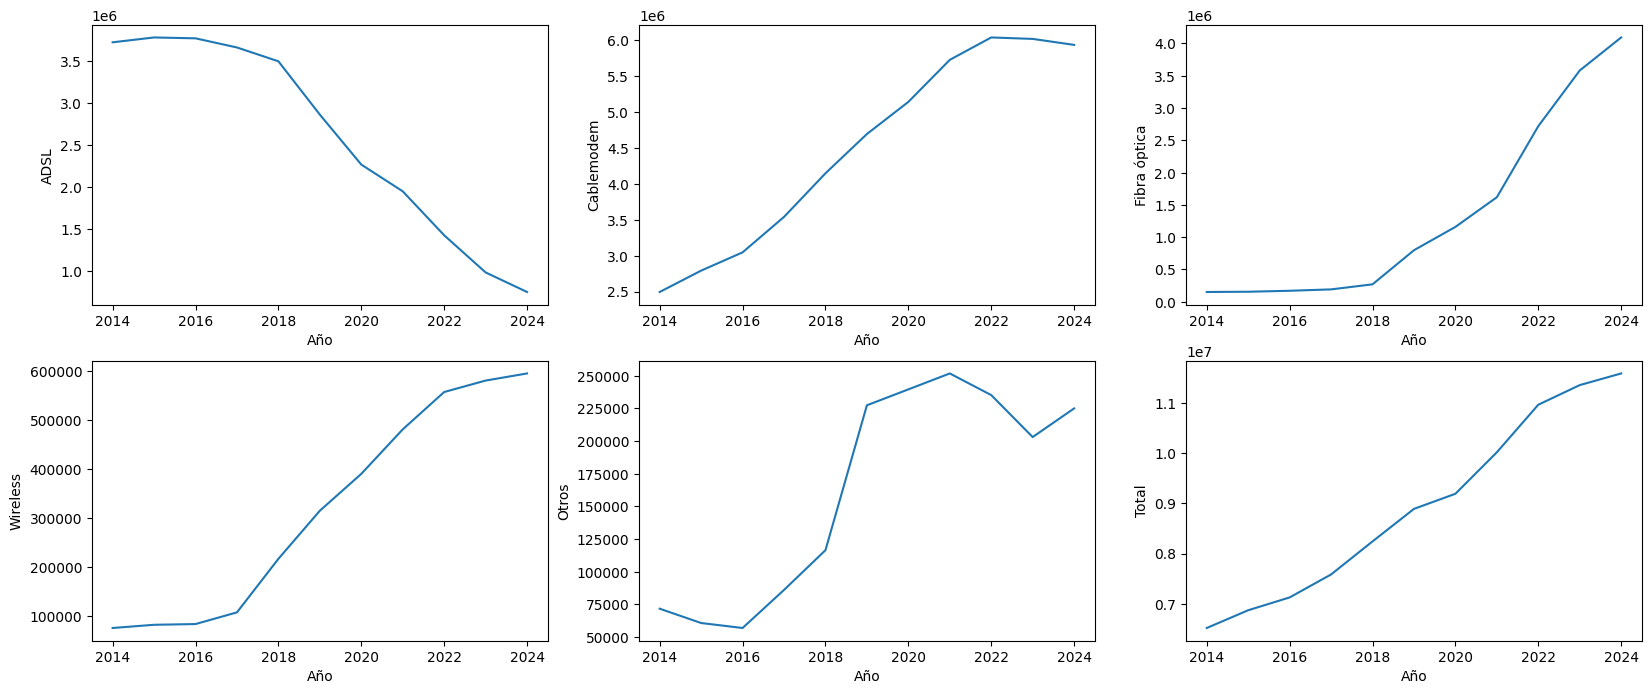

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.lineplot(data=tecno_total_accesos,x='Año',y='ADSL', ax=axes[0, 0], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Cablemodem', ax=axes[0, 1], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Fibra óptica', ax=axes[0, 2], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Wireless', ax=axes[1, 0], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Otros', ax=axes[1, 1], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Total', ax=axes[1, 2], errorbar=None)

plt.show()

De acá se puede observar que, para todas las tecnologias, excepto ADSL, hay una tendencia al crecimiento.

Esto se puede explicar porque:
1. La tendencia a depender cada vez de una conexion a internet, sea para entretenimiento, comunicacion, informacion o trabajo.
2. Dicha necesidad va de la mano de conexiones mas confiables y rápidas, para lo cual la tecnologia ADSL tiene limitaciones, por lo que la poblacion prefiere ir a opciones rapidas y modernas como la fibra óptica por ejemplo.

In [61]:
print(tecno_total_accesos.duplicated().sum())

0


el dataset **no tiene filas duplicadas.**

## 6. Accesos por tecnología por provincia

In [62]:
tecno_accesos.shape

(1009, 9)

El dataset tiene 1009 filas y 9 columnas, **se verá por qué la diferencia en las filas en unos momentos.**

In [63]:
tecno_accesos.columns.tolist()

['Año',
 'Trimestre',
 'Provincia',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros',
 'Total']

Se observa que las columnas del dataset corresponden a los accesos por tipo de tecnologia, separados segun el año, trimestre y provincia.

In [64]:
tecno_accesos.nunique()

Año              13
Trimestre         8
Provincia        24
ADSL            896
Cablemodem      889
Fibra óptica    753
Wireless        715
Otros           671
Total           998
dtype: int64

Se observa lo siguiente:
* A diferencia de datasets anteriores, hay 13 años unicos (2 mas de lo esperado)
* Hay 8 valores unicos de trimestre (deberian ser solo 4)

In [65]:
print(f'Años:\n {tecno_accesos['Año'].unique().tolist()}')
print(f'Trimestres:\n {tecno_accesos['Trimestre'].unique().tolist()}')
print('\nProvincias:')
tecno_accesos['Provincia'].unique().tolist()

Años:
 [2024, 2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015, 2014, nan, '*']
Trimestres:
 [2, 1, 4, 3, '3 *', '2 *', '1 *', nan, 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']

Provincias:


['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán',
 nan]

Se observa que hay unos valores con * y una leyenda. La leyenda dice:

***'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'***

De aca se puede entender que hay informacion reincorporada que no esta en los valores nacionales, por lo que se pueden tomar estos como los mas precisos y correctos.

Esta leyenda probablemente haya venido con el dataset como una linea extra al final de la tabla. Para corroborar, se ejecutará el siguiente codigo.

In [66]:
tecno_accesos.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como la data viene de un archivo excel, se evidencia que al final de la tabla se dejo una fila en blanco y se añadió la explicacion correspondiente a las filas con *, los cuales son los 3 primeros trimestres del año 2019.

Como se dijo anteriormente, la leyenda nos indica que estos datos son mas precisos, por lo que para poder trabajar con ellos se mantendran en el data set y se modificaran los valores correspondientes para eliminar el '*'. Para ellos se ejecutaran las siguientes lineas de codigo:

In [67]:
tecno_accesos.replace({'Año':{'2019 *':2019},
                       'Trimestre':{'1 *': 1,
                                    '2 *': 2,
                                    '3 *': 3}},
                                 inplace=True)

tecno_accesos.dropna(inplace=True)

tecno_accesos.nunique()

Año              11
Trimestre         4
Provincia        24
ADSL            896
Cablemodem      889
Fibra óptica    753
Wireless        715
Otros           671
Total           998
dtype: int64

* La primera linea de codigo es para remover los * y reemplazarlos por los valores correspondientes.
* El segundo bloque de codigo es para eliminar las 2 ultimas filas y quedarnos solo con los valores.

Ahora se puede observar que despues de este cambio se tienen la cantidad de valores unicos esperados y correctos para las columnas de Año, Trimestre y Provincia.

In [68]:
tecno_accesos.shape

(1007, 9)

Ahora se observa que hay solo 1007 filas, por lo que hay una faltante (deberian ser 1008)

In [69]:
tecno_accesos.groupby('Año').count()

,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Año,,,,,,,,
2014,96,96,96,96,96,96,96,96
2015,96,96,96,96,96,96,96,96
2016,96,96,96,96,96,96,96,96
2017,96,96,96,96,96,96,96,96
2018,96,96,96,96,96,96,96,96
2019,96,96,96,96,96,96,96,96
2020,96,96,96,96,96,96,96,96
2021,96,96,96,96,96,96,96,96
2022,96,96,96,96,96,96,96,96


Se observa que el valor faltante pertenece al año 2024 (deberian ser 48 filas)

In [70]:
tecno_accesos[tecno_accesos['Año']==2024].value_counts(subset='Trimestre')

Trimestre
2    24
1    23
Name: count, dtype: int64

El valor faltante pertenece al 1er trimestre de 2024

In [71]:
mask3 = set(tecno_accesos[(tecno_accesos['Año']==2024)&(tecno_accesos['Trimestre']==1)]['Provincia'].unique().tolist())
mask3

{'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán'}

In [72]:
set(tecno_accesos['Provincia'].unique().tolist())-mask3

{'Buenos Aires'}

El valor faltante es el de la provincia de Buenos Aires del 1er semestre del 2024

In [73]:
tecno_accesos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1007 non-null   object 
 1   Trimestre     1007 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 78.7+ KB


In [74]:
tecno_accesos.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Se observa que **no hay datos nulos** en este dataset.

In [75]:
tecno_accesos.sort_values(by=['Año','Trimestre','Provincia'], ascending=[False,False,True])

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0
...,...,...,...,...,...,...,...,...,...
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


Corroborando que los datos recolectados van desde el primer trimestre de 2014 hasta el 2do trimetre de 2024

In [76]:
print(tecno_accesos.duplicated().sum())

0


**No hay datos duplicados** en el dataset.

### **Sobre los valores faltantes**

* Para los datasets de penetracion por poblacion y hogares donde faltan 8 provincias al comienzo de la data (1er trimestre 2014), para los KPI que usen dicha data, simplemente se usará como primer dato los valores del 2do trimestre de 2014, ya que los KPI se definieron para cada provincia por separado.

* Para el valor faltante de Buenos Aires el el primer trimestre de 2024, se tomará la media entre los valores del 2do trimestre de 2024 y 4to trimestre de 2023.

# Paso 2: Relación entre variables

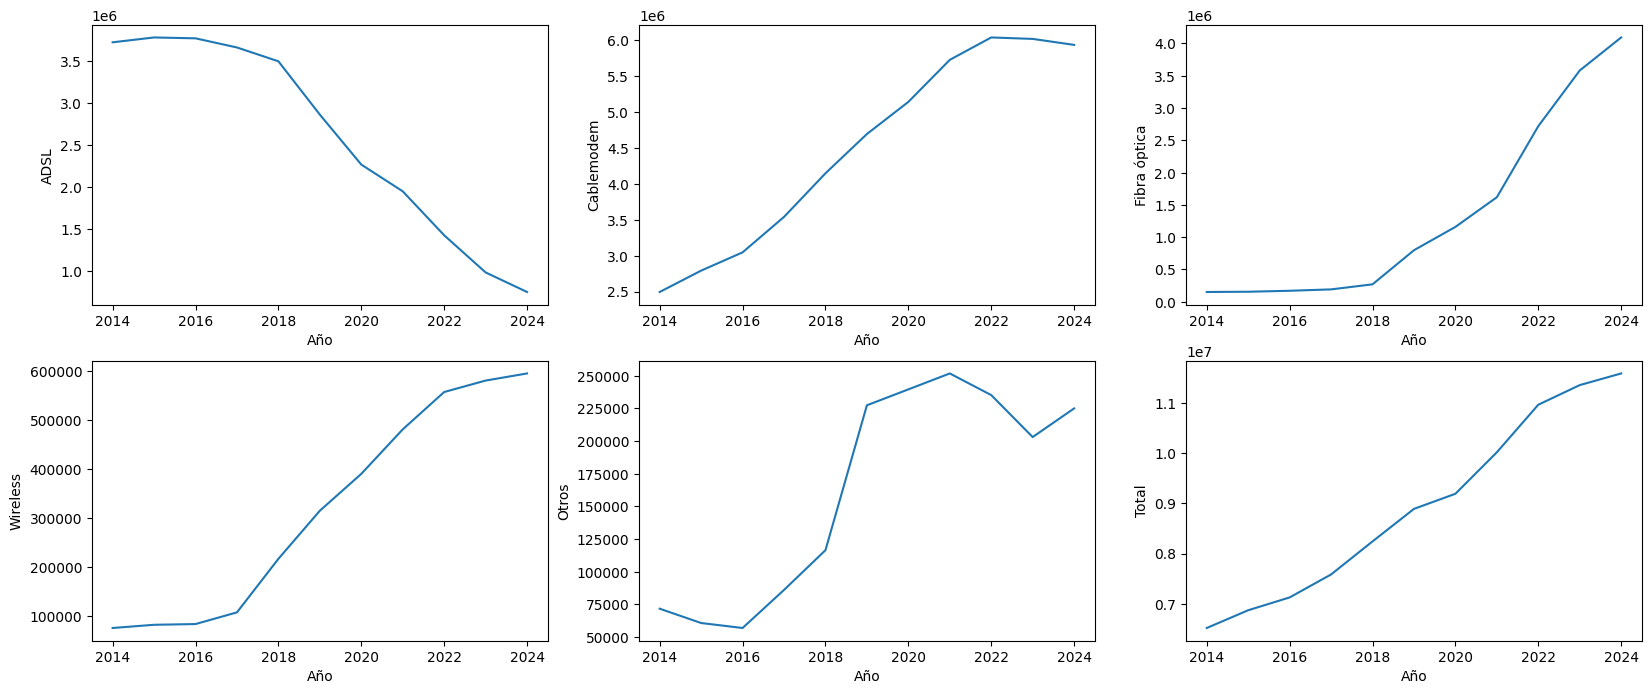

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.lineplot(data=tecno_total_accesos,x='Año',y='ADSL', ax=axes[0, 0], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Cablemodem', ax=axes[0, 1], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Fibra óptica', ax=axes[0, 2], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Wireless', ax=axes[1, 0], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Otros', ax=axes[1, 1], errorbar=None)
sns.lineplot(data=tecno_total_accesos,x='Año',y='Total', ax=axes[1, 2], errorbar=None)

plt.show()

### Mostrando nuevamente la tendencia nacional por tipo de tecnología a través de los años, en este punto tenemos suficiente información para emitir las siguientes observaciones preliminares.

* Hay una tendencia general a que más personas y hogares contraten servicios de internet.

* A excepción de la tecnología ADSL, el número de accesos al resto de tecnologías ha ido aumentando con el tiempo.
* Junto con el hecho de que la telefonía fija también está disminuyendo, nos indica que invertir en tecnología ADSL no es lo ideal, ya que el argentino no solo quiere conectarse a internet, sino que también está demandando internet con buena velocidad, lo cual la tecnología ADSL no puede ofrecer.

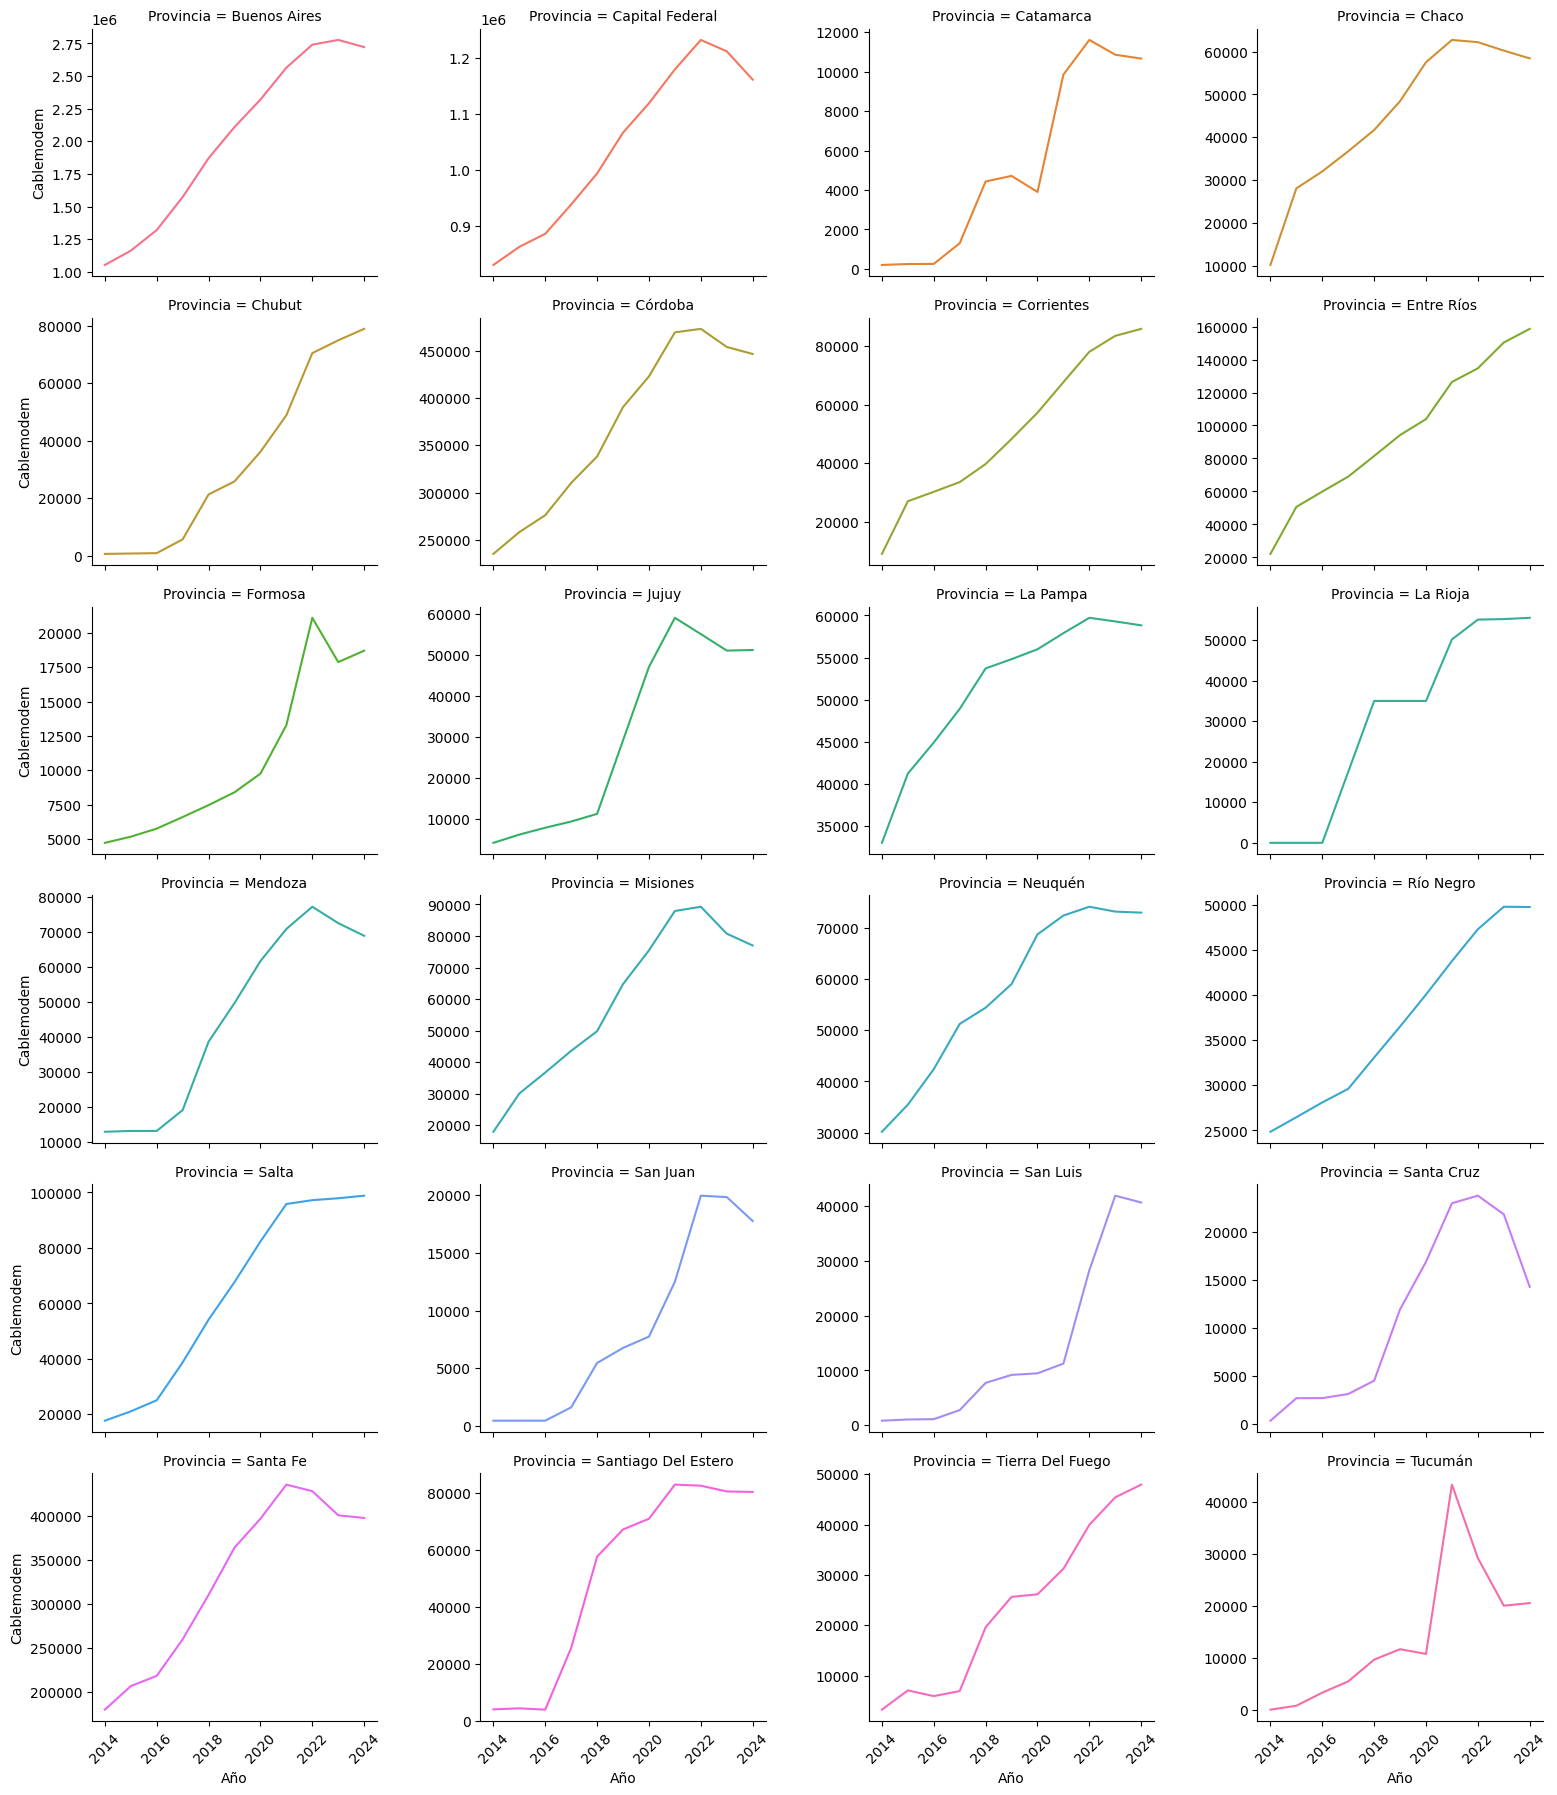

In [78]:
grid = sns.FacetGrid(tecno_accesos, col='Provincia', hue='Provincia', col_wrap= 4, sharey= False)
grid.map_dataframe(sns.lineplot, x='Año', y= 'Cablemodem',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(16)

plt.show()

Usando la data de accesos por tecnologia en cada provincia, el grafico anterior nos muestra la tendencia a traves de los años de cada provincia para para la demanda de Internet por cablemodem.

Si bien la tendencia en general es al crecimiento, el mismo no es similar en cada caso: cada provincia tuvo su propio modo de creciemiento.

* En un grafico anterior se observó que no hay una tendencia homogénea sobre la demanda de televisión por cable, pero aquí sí vemos un aumento de las suscripciones a internet mediante cablemodem (misma vía por donde va la televisión por cable). Buscar captar nuevos clientes mediante esta tecnología ayudaría a obtener más accesos a bajo costo debido a que se utilizaría una infraestructura ya existente, lo que haría fácil la oferta de planes atractivos para los clientes, no solo incrementando la cartera de clientes sino que favorecería la retención de las suscripciones de televisión por cable al mismo tiempo.

En la data, ademas de ADSL y cablemodem, se encuentran las siguientes tecnologias:
* Fibra óptica
* Wireless
* Otros

En graficas nacionales pudimos ver que estas 3 estan en crecimiento, pero solo la fibra óptica esta por el orden de los millones, por lo que podemos intuir que aquellos que usaban ADSL estan migrando principalmente a esta tecnologia.

Esta afirmación la pondremos a prueba mediante el siguiente mapa de calor:

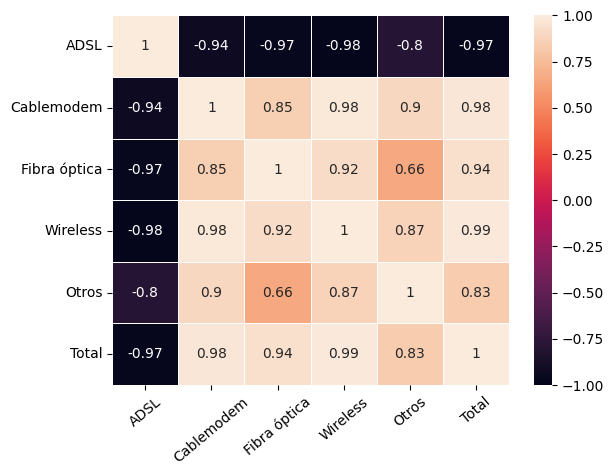

In [79]:
tecno_corr = tecno_total_accesos[['ADSL','Cablemodem','Fibra óptica','Wireless','Otros','Total']].corr()

sns.heatmap(tecno_corr, annot=True, linewidth=.5, vmin=-1)
plt.xticks(rotation=40)
plt.show()

Se observa principalmente la correlacion negativa casi perfecta entre la disminucion del uso de ADSL y el crecimiento de cablemodem, fibra óptica y wireless.

De aquí se concluye que en la medida que la gente dejaba de usar ADSL, migraba a tecnologias que ofrecian mayor velocidad.

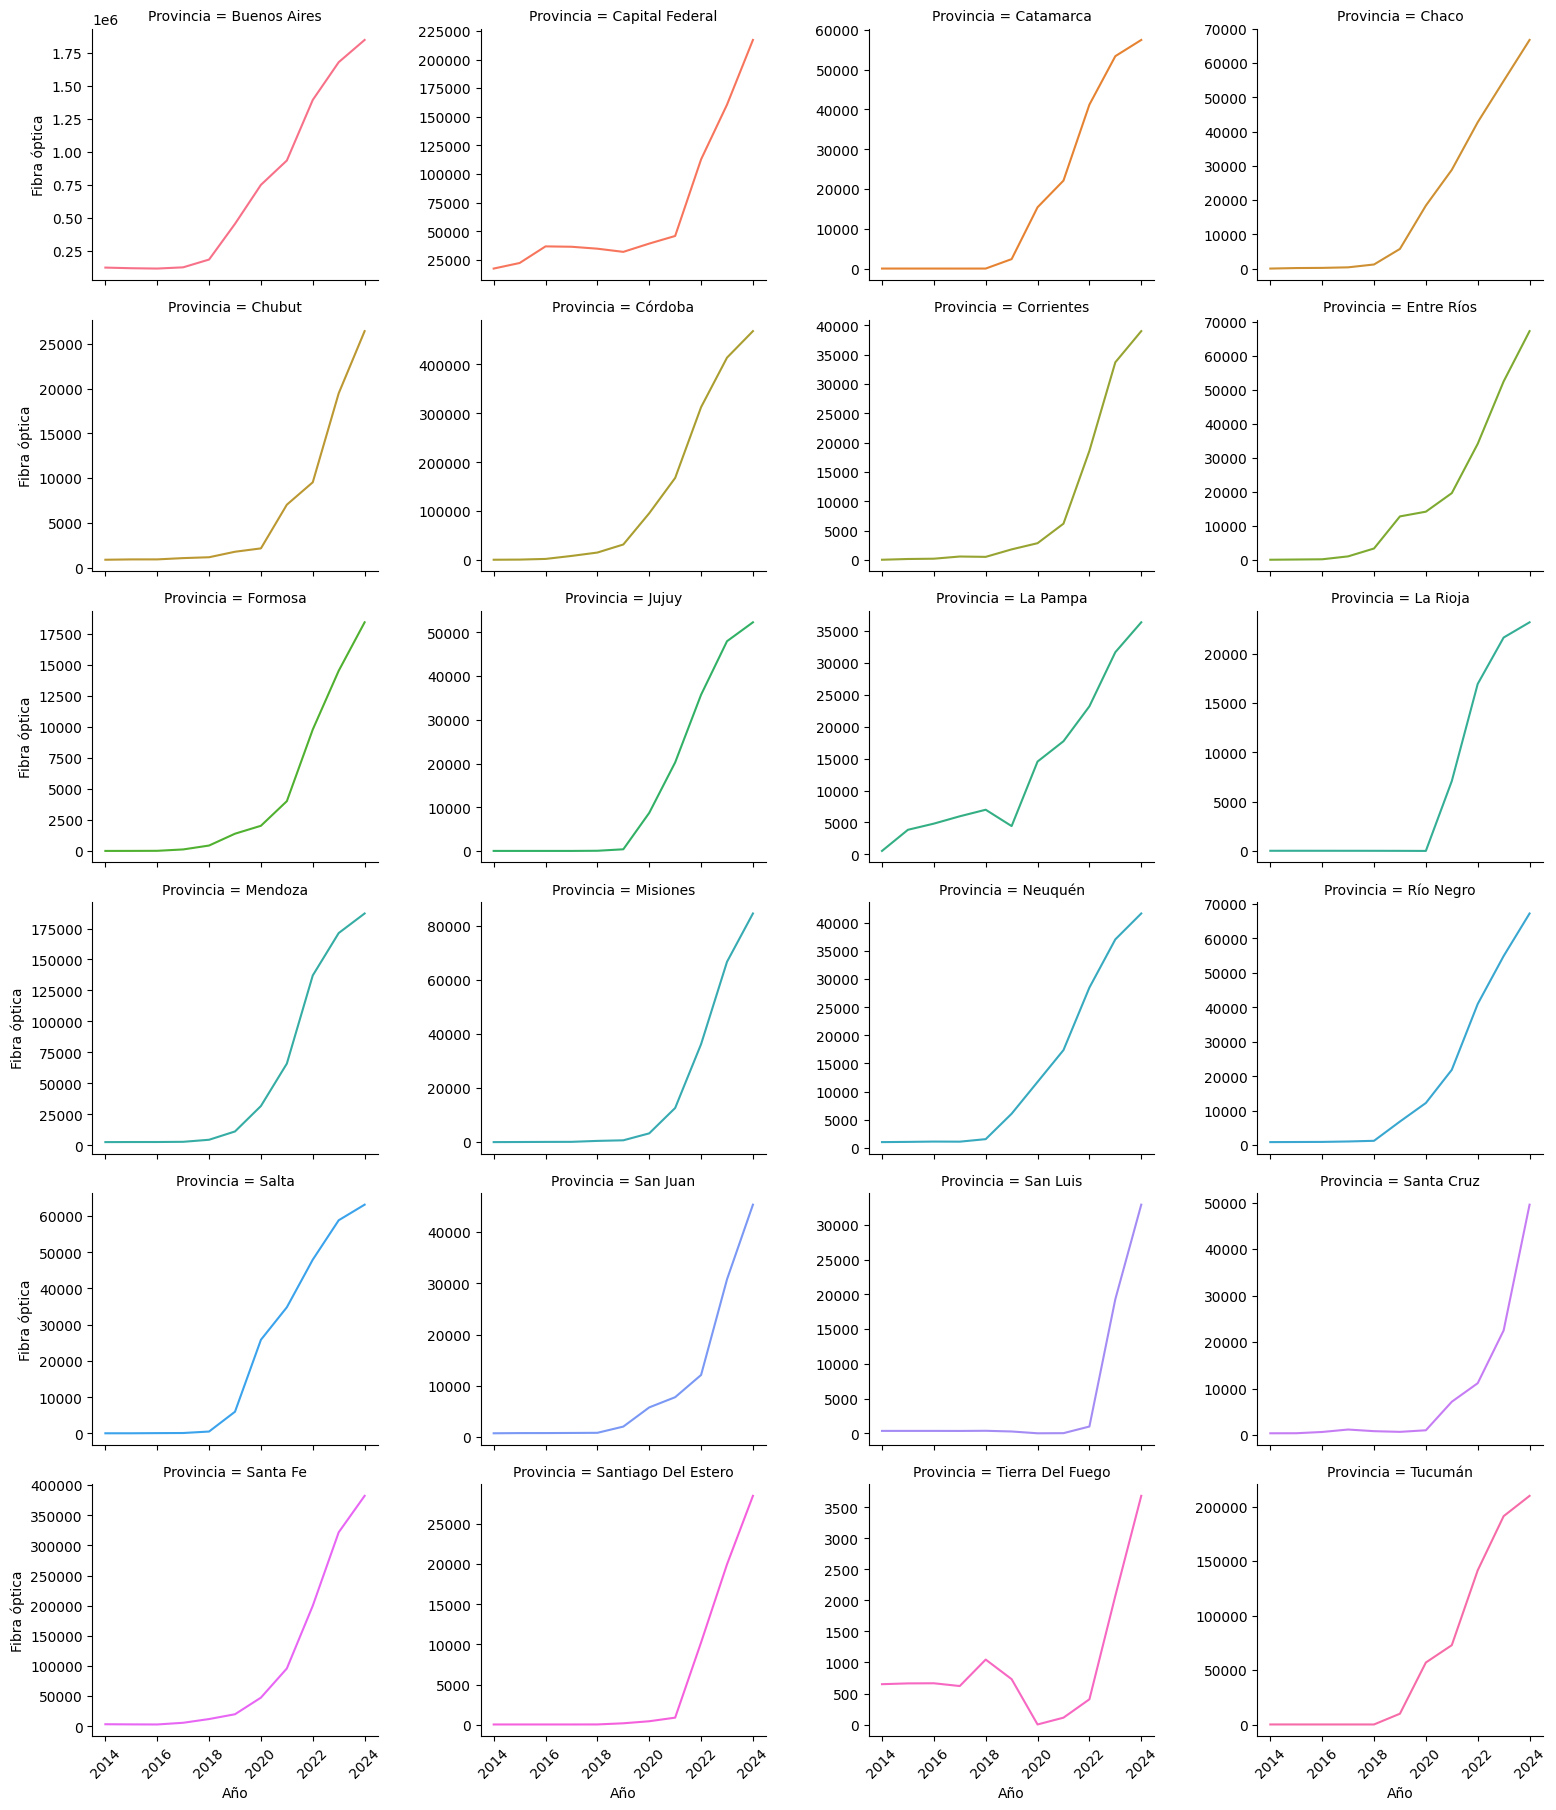

In [80]:
grid = sns.FacetGrid(tecno_accesos, col='Provincia', hue='Provincia', col_wrap= 4, sharey= False)
grid.map_dataframe(sns.lineplot, x='Año', y= 'Fibra óptica',errorbar=None)
grid.tick_params(axis='x', labelrotation=45)
grid.figure.set_figwidth(16)

plt.show()

En los gráficos anteriores podemos ver el comportamiento a través del tiempo de la demanda de fibra óptica por provincia.

Lo que más resalta es como, en general, el comportamiento es similar: un crecimiento casi exponencial que comienza en casi todas las provincias entre 2020 y 2022.

* Esto se puede explicar debido a la pandemia: las personas se vieron obligadas a pasar cuarentena en sus hogares, por lo que su modo de vida cambio por completo. Al pasar más tiempo en casa, el entretenimiento se reduce a aquello que podamos obtener desde ella y eso incluye: Redes sociales, películas, videos. También nuestra comunicación se vuelve exclusivamente en línea, y el teletrabajo también, lo cual acarrea que, para mantener el rendimiento y la productividad, era necesario invertir en internet de calidad y veloz, especialmente si era compartido con más personas en el mismo lugar para múltiples fines.

* De aquí se puede ver, y junto con los valores de accesos totales nacionales, que durante la pandemia, los argentinos escogieron la fibra óptica como su tecnología preferida para contratar o migrar servicios de internet.

# Insights

* El numero de accesos a telefonía fija disminuye con el tiempo.

* El numero de accesos a la tecnologia ADSL para navegar en internet disminuye.
* El comportamiento en la cantidad de suscripciones a television por cable por provincias a través del tiempo no es homogeneo.
* Sin embargo, el numero de accesos a internet mediante cablemodem (misma infraestructura de television por cable) tiende a aumentar a través del tiempo.
* La fibra óptica muestra crecimiento exponencial en todas las provincias a partir del rango de años entre 2019-2022.

# Conclusiones

* La telefonía fija, y por ende, el ADSL, son tecnologías que están siendo descartadas por los consumidores argentinos.

* La demanda de internet mediante cablemodem es creciente, independientemente del comportamiento de su compañera de infraestructura la televisión por cable.

* Los proveedores de fibra óptica fueron los mas beneficiados de las consecuencias de la pandemia.

# Recomendaciones

* No invertir en ADSL, ya que es una tecnología con limitaciones y que ya está siendo descartada por el público.

* Incrementar la oferta de planes de internet a aquellos que ya tienen suscripcion de television por cable.

* Incrementar la oferta de planes de internet mediante fibra óptica, en especial en aquellas zonas donde hay accesos a telefonia fija, para capitalizar la posible migración.

# Propuestas de KPI

### 1. Aumentar en 1% la proporcion de la cobertura de acceso a internet mediante cablemovil a internet con respecto al total de accesos a television por cable, para el proximo trimestre, por provincia.

La formula es:

$ KPI = \left(\frac{\text{nuevo total accesos a cablemodem}}{\text{nuevo total accesos television por suscripcion}} - \frac{\text{actual total accesos a cablemodem}}{\text{actual total accesos television por suscripcion}}\right)\times 100 $

Donde:

* *"nuevo total accesos a cablemodem"* es el número de accesos a Internet mediante cablemoden del próximo trimestre.

* *"nuevo total accesos television por suscripcion"* es el número de accesos a television por suscripcion del próximo trimestre.

* *"actual total accesos a cablemodem"* es el número de accesos a Internet mediante cablemoden del trimestre actual.

* *"actual total accesos television por suscripcion"* es el número de accesos a television por suscripcion del trimestre actual.

### 2. Aumentar en 5% el numero total de accesos a internet mediante fibra óptica a internet, para el proximo trimestre, por provincia.

La formula es:

$ KPI = \left(\frac{\text{nuevo total accesos a fibra óptica - actual total accesos a fibra óptica}}{\text{actual total accesos a fibra óptica}}\right)\times 100 $

Donde:

* *"nuevo total accesos a fibra óptica"* es el número de accesos a Internet mediante fibra óptica del próximo trimestre.

* *"actual total accesos a fibra óptica"* es el número de accesos a internet mediante fibra óptica del trimestre actual.

### 3. Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

La formula es:

$ KPI = \left(\frac{\text{nuevo acceso -  acceso actual}}{\text{acceso actual}}\right)\times 100 $

Donde:

* *"Nuevo acceso"* se refiere al número de hogares con acceso a Internet después del próximo trimestre

* *"Acceso actual"* se refiere al número de hogares con acceso a Internet en el trimestre actual.